# Experimentation of KNN

In [1]:
!python -m pip install session_rec_introml

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import numpy as np
from model import Knn, ItemKnn
from data import DataManipulation
from evaluation.EvaluationMetric import mean_reciprocal_rank, hit_rate
import time
from sklearn.model_selection import LeaveOneOut



## load Data and initialization

In [2]:
data_manip = DataManipulation()
data = pd.read_csv("../sigir_train_full.txt")

data_train, data_test, _ = data_manip.train_test_split(data, None, 0.25)
max_item = np.max(pd.unique(data["ItemId"]))


train size was modified real train session size is None


## ItemKNN Test

100%|██████████| 1898/1898 [00:01<00:00, 1551.06it/s]


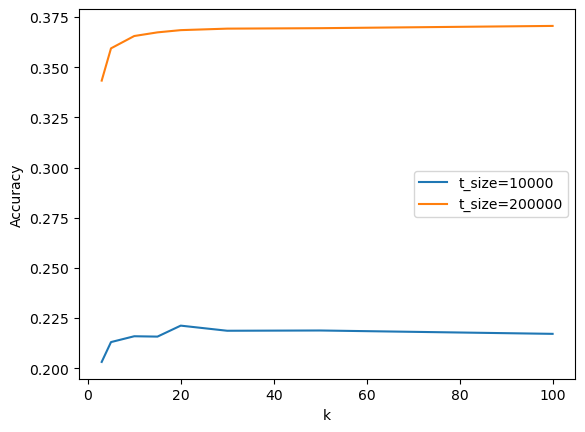

In [4]:
predictors = [ItemKnn(5, max_item + 1)]
training_size = [10000, 200000, 500000, 1000000]
training_size = [10000, 200000]
accuracy = dict()
mrr_accuracy = dict()
k_values = [3, 5, 10, 15, 20, 30, 50, 100]
# k_values = [3]
test_size = 10000

for prd in predictors:
    for train_size in training_size:
        # train_set, test_set = train_test_split(data,test_size=test_size,train_size=train_size)
        accuracy[train_size] = []
        mrr_accuracy[train_size] = []
        train_set = data[:train_size]
        test_set = data[train_size : train_size + test_size]
        max_item = np.max(pd.unique(train_set["ItemId"]))
        prd._max_item_id = max_item + 1
        prd.fit(train_set)
        test_set, test_target = data_manip.prepare_data_for_test(test_set)
        for k in k_values:
            prd._k = k
            accuracy[train_size].append(prd.score(test_set, test_target))
            mrr_accuracy[train_size].append(prd.mrr_score(test_set, test_target))


pyplot.figure()
for size in training_size:
    pyplot.plot(k_values, mrr_accuracy[size], label=f"t_size={size}")
pyplot.xlabel("k")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.show()

In [ ]:
k_values = [3, 11, 25, 35, 75]
prediction_numbers = [5,10,20]
scores = [[],[],[]]
count_p = 0
data_train_fine, _, _ = data_manip.train_test_split(data_train, 80000, None)
knn = ItemKnn(3, max_item + 1)
for p_numbers in prediction_numbers:
    
    for k in k_values:

        knn._k = ItemKnn(k, max_item + 1)

        count = 0
        train_acc, valid_acc = 0, 0
        for train_d, train_t in data_manip.kFold_split(data_train_fine, 5):
            print(f"train_d size : {train_d.shape}")
            print(f"train_t size : {train_t.shape}")
            
            print(f"knn k : {knn._k}")

            test_set, test_target = data_manip.prepare_data_for_test(train_t)
            y_hat = knn.predict(test_set)
            valid_acc += mean_reciprocal_rank(y_hat, test_target)
            # valid_acc += knn.mrr_score(test_set, test_target)
            count += 1
        scores[count_p].append(valid_acc/count)
    count_p += 1

fig = pyplot.figure()
ax = fig.add_subplot(111)

ax.set_title('Session - K_nn avec des nombres de prédictions différents')  # À modifier / to be modified
ax.plot(k_values, scores[0], 'r--', label=f"Nombre de prédictions : {prediction_numbers[0]}") # À compléter / to be completed
ax.plot(k_values, scores[1], 'b--', label=f"Nombre de prédictions : {prediction_numbers[1]}") # À compléter / to be completed
ax.plot(k_values, scores[2], 'y--', label=f"Nombre de prédictions : {prediction_numbers[2]}")
ax.set_xticks(k_values, k_values)
ax.grid(axis='x')
ax.set_xlabel("Values of K")
ax.set_ylabel("MRR")
pyplot.legend()
pyplot.show()

### SKNN Tests

Le but de cette expérience est de présenter les résultats de l'algorithmo session based Knn pou rl'apprentissage des recommandations à partir de l'algorithme Knn basé sur une session. Cette méthode Session Based Knn se base sur l'ensemble des actions de l'utilisateur actuelle et considère les k-sessions apprises les plus similaires. C'est ainsi qu'étant donné une session s, un ensemble de K sessions  voisines et une fonction de similarité retournant le score de similarité entre les différentes sessionsvoisines et la la session à évaluer 

train size was modified real train session size is 70000


  0%|          | 0/70000 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 70000/70000 [00:34<00:00, 2025.16it/s]


train_d size : (26307, 3)
train_t size : (6149, 3)
knn k : 3


  0%|          | 0/1183 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1183 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1183 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25868, 3)
train_t size : (6588, 3)
knn k : 3


  0%|          | 0/1250 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1250 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1250 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25981, 3)
train_t size : (6475, 3)
knn k : 3


  0%|          | 0/1197 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1197 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1197 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25823, 3)
train_t size : (6633, 3)
knn k : 3


  0%|          | 0/1226 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1226 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1226 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25845, 3)
train_t size : (6611, 3)
knn k : 3


  0%|          | 0/1219 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1219 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1219 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26242, 3)
train_t size : (6214, 3)
knn k : 11


  0%|          | 0/1152 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1152 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1152 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25825, 3)
train_t size : (6631, 3)
knn k : 11


  0%|          | 0/1275 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1275 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1275 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25785, 3)
train_t size : (6671, 3)
knn k : 11


  0%|          | 0/1228 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1228 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1228 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26176, 3)
train_t size : (6280, 3)
knn k : 11


  0%|          | 0/1188 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1188 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1188 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25796, 3)
train_t size : (6660, 3)
knn k : 11


  0%|          | 0/1232 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1232 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1232 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25924, 3)
train_t size : (6532, 3)
knn k : 25


  0%|          | 0/1193 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1193 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1193 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26177, 3)
train_t size : (6279, 3)
knn k : 25


  0%|          | 0/1182 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1182 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1182 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26174, 3)
train_t size : (6282, 3)
knn k : 25


  0%|          | 0/1233 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1233 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1233 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25734, 3)
train_t size : (6722, 3)
knn k : 25


  0%|          | 0/1236 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1236 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1236 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25815, 3)
train_t size : (6641, 3)
knn k : 25


  0%|          | 0/1231 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1231 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1231 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25982, 3)
train_t size : (6474, 3)
knn k : 35


  0%|          | 0/1206 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1206 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1206 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26155, 3)
train_t size : (6301, 3)
knn k : 35


  0%|          | 0/1210 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1210 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1210 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25593, 3)
train_t size : (6863, 3)
knn k : 35


  0%|          | 0/1201 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1201 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1201 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26097, 3)
train_t size : (6359, 3)
knn k : 35


  0%|          | 0/1235 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1235 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1235 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25997, 3)
train_t size : (6459, 3)
knn k : 35


  0%|          | 0/1223 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1223 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1223 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26565, 3)
train_t size : (5891, 3)
knn k : 75


  0%|          | 0/1156 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1156 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1156 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25888, 3)
train_t size : (6568, 3)
knn k : 75


  0%|          | 0/1230 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1230 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1230 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25798, 3)
train_t size : (6658, 3)
knn k : 75


  0%|          | 0/1223 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1223 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1223 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25878, 3)
train_t size : (6578, 3)
knn k : 75


  0%|          | 0/1217 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1217 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1217 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25695, 3)
train_t size : (6761, 3)
knn k : 75


  0%|          | 0/1249 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1249 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1249 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25929, 3)
train_t size : (6527, 3)
knn k : 3


  0%|          | 0/1244 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1244 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1244 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26027, 3)
train_t size : (6429, 3)
knn k : 3


  0%|          | 0/1186 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1186 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1186 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25956, 3)
train_t size : (6500, 3)
knn k : 3


  0%|          | 0/1185 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1185 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1185 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25807, 3)
train_t size : (6649, 3)
knn k : 3


  0%|          | 0/1242 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1242 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1242 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26105, 3)
train_t size : (6351, 3)
knn k : 3


  0%|          | 0/1218 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1218 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1218 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25711, 3)
train_t size : (6745, 3)
knn k : 11


  0%|          | 0/1246 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1246 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1246 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25917, 3)
train_t size : (6539, 3)
knn k : 11


  0%|          | 0/1208 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1208 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1208 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25818, 3)
train_t size : (6638, 3)
knn k : 11


  0%|          | 0/1225 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1225 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1225 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25966, 3)
train_t size : (6490, 3)
knn k : 11


  0%|          | 0/1255 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1255 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1255 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26412, 3)
train_t size : (6044, 3)
knn k : 11


  0%|          | 0/1141 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1141 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1141 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26202, 3)
train_t size : (6254, 3)
knn k : 25


  0%|          | 0/1192 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1192 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1192 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26223, 3)
train_t size : (6233, 3)
knn k : 25


  0%|          | 0/1220 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1220 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1220 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25862, 3)
train_t size : (6594, 3)
knn k : 25


  0%|          | 0/1220 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1220 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1220 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26081, 3)
train_t size : (6375, 3)
knn k : 25


  0%|          | 0/1200 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1200 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1200 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25456, 3)
train_t size : (7000, 3)
knn k : 25


  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25921, 3)
train_t size : (6535, 3)
knn k : 35


  0%|          | 0/1203 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1203 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1203 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26558, 3)
train_t size : (5898, 3)
knn k : 35


  0%|          | 0/1179 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1179 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1179 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25647, 3)
train_t size : (6809, 3)
knn k : 35


  0%|          | 0/1256 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1256 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1256 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25741, 3)
train_t size : (6715, 3)
knn k : 35


  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25957, 3)
train_t size : (6499, 3)
knn k : 35


  0%|          | 0/1194 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1194 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1194 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25621, 3)
train_t size : (6835, 3)
knn k : 75


  0%|          | 0/1210 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1210 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1210 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26377, 3)
train_t size : (6079, 3)
knn k : 75


  0%|          | 0/1193 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1193 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1193 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25885, 3)
train_t size : (6571, 3)
knn k : 75


  0%|          | 0/1202 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1202 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1202 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26015, 3)
train_t size : (6441, 3)
knn k : 75


  0%|          | 0/1203 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1203 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1203 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25926, 3)
train_t size : (6530, 3)
knn k : 75


  0%|          | 0/1267 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1267 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1267 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25923, 3)
train_t size : (6533, 3)
knn k : 3


  0%|          | 0/1217 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1217 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1217 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26098, 3)
train_t size : (6358, 3)
knn k : 3


  0%|          | 0/1233 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1233 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1233 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25994, 3)
train_t size : (6462, 3)
knn k : 3


  0%|          | 0/1205 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1205 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1205 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25996, 3)
train_t size : (6460, 3)
knn k : 3


  0%|          | 0/1205 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1205 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1205 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25813, 3)
train_t size : (6643, 3)
knn k : 3


  0%|          | 0/1215 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1215 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1215 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26219, 3)
train_t size : (6237, 3)
knn k : 11


  0%|          | 0/1239 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1239 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1239 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25719, 3)
train_t size : (6737, 3)
knn k : 11


  0%|          | 0/1228 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1228 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1228 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26365, 3)
train_t size : (6091, 3)
knn k : 11


  0%|          | 0/1195 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1195 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1195 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26205, 3)
train_t size : (6251, 3)
knn k : 11


  0%|          | 0/1176 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1176 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1176 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25316, 3)
train_t size : (7140, 3)
knn k : 11


  0%|          | 0/1237 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1237 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1237 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25491, 3)
train_t size : (6965, 3)
knn k : 25


  0%|          | 0/1270 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1270 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1270 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26076, 3)
train_t size : (6380, 3)
knn k : 25


  0%|          | 0/1211 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1211 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1211 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26082, 3)
train_t size : (6374, 3)
knn k : 25


  0%|          | 0/1203 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1203 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1203 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26386, 3)
train_t size : (6070, 3)
knn k : 25


  0%|          | 0/1163 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1163 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1163 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25789, 3)
train_t size : (6667, 3)
knn k : 25


  0%|          | 0/1228 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1228 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1228 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26240, 3)
train_t size : (6216, 3)
knn k : 35


  0%|          | 0/1187 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1187 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1187 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25718, 3)
train_t size : (6738, 3)
knn k : 35


  0%|          | 0/1252 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1252 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1252 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25772, 3)
train_t size : (6684, 3)
knn k : 35


  0%|          | 0/1211 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1211 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1211 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25894, 3)
train_t size : (6562, 3)
knn k : 35


  0%|          | 0/1233 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1233 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1233 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26200, 3)
train_t size : (6256, 3)
knn k : 35


  0%|          | 0/1192 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1192 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1192 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26346, 3)
train_t size : (6110, 3)
knn k : 75


  0%|          | 0/1158 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1158 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1158 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25963, 3)
train_t size : (6493, 3)
knn k : 75


  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25689, 3)
train_t size : (6767, 3)
knn k : 75


  0%|          | 0/1231 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1231 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1231 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (25808, 3)
train_t size : (6648, 3)
knn k : 75


  0%|          | 0/1262 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1262 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1262 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26018, 3)
train_t size : (6438, 3)
knn k : 75


  0%|          | 0/1181 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1181 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1181 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a li

train_d size : (26430, 3)
train_t size : (6026, 3)
knn k : 3


  0%|          | 0/1183 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1183 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1183/1183 [00:02<00:00, 584.65it/s]


train_d size : (25696, 3)
train_t size : (6760, 3)
knn k : 3


  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1243 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1243/1243 [00:01<00:00, 709.54it/s]


train_d size : (25787, 3)
train_t size : (6669, 3)
knn k : 3


  0%|          | 0/1224 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1224 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1224/1224 [00:01<00:00, 811.01it/s]


train_d size : (26084, 3)
train_t size : (6372, 3)
knn k : 3


  0%|          | 0/1196 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1196 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1196/1196 [00:01<00:00, 624.89it/s]


train_d size : (25827, 3)
train_t size : (6629, 3)
knn k : 3


  0%|          | 0/1229 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1229 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1229/1229 [00:02<00:00, 491.40it/s]


train_d size : (25686, 3)
train_t size : (6770, 3)
knn k : 11


  0%|          | 0/1291 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1291 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1291/1291 [00:02<00:00, 552.23it/s]


train_d size : (26015, 3)
train_t size : (6441, 3)
knn k : 11


  0%|          | 0/1172 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1172 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1172/1172 [00:01<00:00, 976.26it/s]


train_d size : (26369, 3)
train_t size : (6087, 3)
knn k : 11


  0%|          | 0/1224 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1224 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1224/1224 [00:01<00:00, 974.12it/s] 


train_d size : (26087, 3)
train_t size : (6369, 3)
knn k : 11


  0%|          | 0/1219 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1219 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1219/1219 [00:01<00:00, 807.84it/s]


train_d size : (25667, 3)
train_t size : (6789, 3)
knn k : 11


  0%|          | 0/1169 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1169 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1169/1169 [00:02<00:00, 570.55it/s]


train_d size : (25703, 3)
train_t size : (6753, 3)
knn k : 25


  0%|          | 0/1223 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1223 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1223/1223 [00:05<00:00, 211.03it/s]


train_d size : (26217, 3)
train_t size : (6239, 3)
knn k : 25


  0%|          | 0/1178 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1178 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1178/1178 [00:15<00:00, 77.05it/s] 


train_d size : (25757, 3)
train_t size : (6699, 3)
knn k : 25


  0%|          | 0/1249 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1249 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1249/1249 [00:02<00:00, 502.92it/s]


train_d size : (26256, 3)
train_t size : (6200, 3)
knn k : 25


  0%|          | 0/1191 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1191 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1191/1191 [00:03<00:00, 353.44it/s]


train_d size : (25891, 3)
train_t size : (6565, 3)
knn k : 25


  0%|          | 0/1234 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1234 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1234/1234 [00:04<00:00, 271.83it/s]


train_d size : (25851, 3)
train_t size : (6605, 3)
knn k : 35


  0%|          | 0/1214 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1214 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1214/1214 [00:04<00:00, 287.19it/s]


train_d size : (26192, 3)
train_t size : (6264, 3)
knn k : 35


  0%|          | 0/1215 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1215 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1215/1215 [00:02<00:00, 483.24it/s]


train_d size : (25954, 3)
train_t size : (6502, 3)
knn k : 35


  0%|          | 0/1192 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1192 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1192/1192 [00:03<00:00, 339.28it/s]


train_d size : (26084, 3)
train_t size : (6372, 3)
knn k : 35


  0%|          | 0/1227 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1227 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1227/1227 [00:02<00:00, 409.82it/s]


train_d size : (25743, 3)
train_t size : (6713, 3)
knn k : 35


  0%|          | 0/1227 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1227 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1227/1227 [00:01<00:00, 615.89it/s]


train_d size : (25964, 3)
train_t size : (6492, 3)
knn k : 75


  0%|          | 0/1183 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1183 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1183/1183 [00:04<00:00, 277.39it/s]


train_d size : (26020, 3)
train_t size : (6436, 3)
knn k : 75


  0%|          | 0/1188 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1188 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1188/1188 [00:03<00:00, 336.33it/s]


train_d size : (26195, 3)
train_t size : (6261, 3)
knn k : 75


  0%|          | 0/1196 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1196 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1196/1196 [00:01<00:00, 850.83it/s]


train_d size : (26103, 3)
train_t size : (6353, 3)
knn k : 75


  0%|          | 0/1213 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1213 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1213/1213 [00:02<00:00, 566.10it/s]


train_d size : (25542, 3)
train_t size : (6914, 3)
knn k : 75


  0%|          | 0/1295 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/1295 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1295/1295 [00:03<00:00, 413.14it/s]


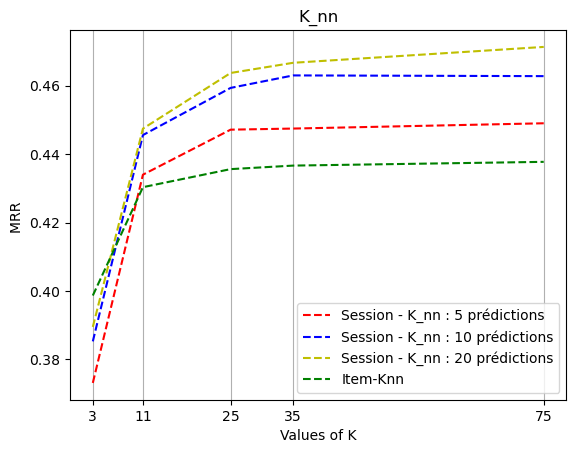

In [5]:
k_values = [3, 11, 25, 35, 75]
prediction_numbers = [5,10,20, 0]
scores = [[],[],[], []]
count_p = 0
data_train_fine, _, _ = data_manip.train_test_split(data_train, 70000, None)
for p_numbers in prediction_numbers:
    if (count_p == 3) :
        knn = ItemKnn(k, max_item + 1)
        knn.fit(data_train_fine)
        for k in k_values:

            knn._k = k
            count = 0
            train_acc, valid_acc = 0, 0
            for train_d, train_t in data_manip.kFold_split(data_train_fine, 5):
                print(f"train_d size : {train_d.shape}")
                print(f"train_t size : {train_t.shape}")
                print(f"knn k : {knn._k}")

                test_set, test_target = data_manip.prepare_data_for_test(train_t)
                
                valid_acc += knn.mrr_score(test_set, test_target)
                # valid_acc += knn.mrr_score(test_set, test_target)
                count += 1
            scores[count_p].append(valid_acc/count)
    else:
        k = 3
        knn = Knn(k, max_item + 1, p_numbers)
        knn.fit(data_train_fine)
        for k in k_values:            

            count = 0
            knn._k = k
            train_acc, valid_acc = 0, 0
            for train_d, train_t in data_manip.kFold_split(data_train_fine, 5):
                print(f"train_d size : {train_d.shape}")
                print(f"train_t size : {train_t.shape}")
                
                print(f"knn k : {knn._k}")

                test_set, test_target = data_manip.prepare_data_for_test(train_t)
                y_hat = knn.predict(test_set)
                valid_acc += mean_reciprocal_rank(y_hat, test_target)
                # valid_acc += knn.mrr_score(test_set, test_target)
                count += 1
            scores[count_p].append(valid_acc/count)
    count_p += 1

fig = pyplot.figure()
ax = fig.add_subplot(111)

ax.set_title('K_nn')  # À modifier / to be modified
ax.plot(k_values, scores[0], 'r--', label=f"Session - K_nn : {prediction_numbers[0]} prédictions") # À compléter / to be completed
ax.plot(k_values, scores[1], 'b--', label=f"Session - K_nn : {prediction_numbers[1]} prédictions") # À compléter / to be completed
ax.plot(k_values, scores[2], 'y--', label=f"Session - K_nn : {prediction_numbers[2]} prédictions")
ax.plot(k_values, scores[3], 'g--', label="Item-Knn")
ax.set_xticks(k_values, k_values)
ax.grid(axis='x')
ax.set_xlabel("Values of K")
ax.set_ylabel("MRR ")
pyplot.legend()
pyplot.show()

train size was modified real train session size is 70000
train_d size : (25422, 3)
train_t size : (6455, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4849/4849 [00:02<00:00, 1975.73it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1158/1158 [00:00<00:00, 4844.61it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1158/1158 [00:00<00:00, 1852.75it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (24890, 3)
train_t size : (6987, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4729/4729 [00:02<00:00, 2111.18it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1278/1278 [00:00<00:00, 3644.75it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1278/1278 [00:00<00:00, 2826.32it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25681, 3)
train_t size : (6196, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4808/4808 [00:02<00:00, 2399.74it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1199/1199 [00:00<00:00, 6120.05it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1199/1199 [00:00<00:00, 2439.82it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25734, 3)
train_t size : (6143, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4827/4827 [00:01<00:00, 2415.50it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1180/1180 [00:00<00:00, 3192.85it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1180/1180 [00:00<00:00, 2461.41it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25781, 3)
train_t size : (6096, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4815/4815 [00:05<00:00, 924.36it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1192/1192 [00:00<00:00, 1857.45it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1192/1192 [00:00<00:00, 1544.92it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25826, 3)
train_t size : (6051, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4840/4840 [00:06<00:00, 801.69it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1167/1167 [00:00<00:00, 2465.31it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1167/1167 [00:00<00:00, 1638.24it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25552, 3)
train_t size : (6325, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4809/4809 [00:03<00:00, 1409.17it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1198/1198 [00:00<00:00, 4749.01it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1198/1198 [00:01<00:00, 878.23it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a sin

train_d size : (25788, 3)
train_t size : (6089, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4801/4801 [00:03<00:00, 1584.80it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1206/1206 [00:00<00:00, 2520.32it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1206/1206 [00:00<00:00, 1848.65it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25481, 3)
train_t size : (6396, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4799/4799 [00:06<00:00, 690.93it/s] 


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1208/1208 [00:00<00:00, 1617.21it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1208/1208 [00:00<00:00, 1229.21it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (24861, 3)
train_t size : (7016, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4779/4779 [00:02<00:00, 2197.99it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1228/1228 [00:00<00:00, 2881.74it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1228/1228 [00:00<00:00, 2138.03it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25632, 3)
train_t size : (6245, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4832/4832 [00:02<00:00, 1736.91it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1175/1175 [00:00<00:00, 2008.06it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1175/1175 [00:00<00:00, 1531.08it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25597, 3)
train_t size : (6280, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4802/4802 [00:02<00:00, 2021.09it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1205/1205 [00:00<00:00, 3678.26it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1205/1205 [00:00<00:00, 2586.31it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25642, 3)
train_t size : (6235, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4841/4841 [00:08<00:00, 593.88it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1166/1166 [00:00<00:00, 1460.98it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1166/1166 [00:01<00:00, 1157.60it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25419, 3)
train_t size : (6458, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4800/4800 [00:02<00:00, 2017.10it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1207/1207 [00:00<00:00, 3232.19it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1207/1207 [00:00<00:00, 1488.99it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25218, 3)
train_t size : (6659, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4753/4753 [00:04<00:00, 952.87it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1254/1254 [00:00<00:00, 2958.63it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1254/1254 [00:00<00:00, 2169.45it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25704, 3)
train_t size : (6173, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4849/4849 [00:03<00:00, 1537.85it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1158/1158 [00:01<00:00, 1020.03it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1158/1158 [00:01<00:00, 746.73it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a sin

train_d size : (25760, 3)
train_t size : (6117, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4830/4830 [00:04<00:00, 1085.05it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1177/1177 [00:00<00:00, 2165.05it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1177/1177 [00:00<00:00, 2136.33it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25863, 3)
train_t size : (6014, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4807/4807 [00:05<00:00, 933.85it/s] 


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1200/1200 [00:00<00:00, 2128.25it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1200/1200 [00:00<00:00, 1278.68it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (24846, 3)
train_t size : (7031, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4736/4736 [00:03<00:00, 1567.52it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1271/1271 [00:00<00:00, 2509.05it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1271/1271 [00:01<00:00, 1239.58it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25335, 3)
train_t size : (6542, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4806/4806 [00:02<00:00, 1618.89it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1201/1201 [00:00<00:00, 3474.21it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1201/1201 [00:00<00:00, 2111.06it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25398, 3)
train_t size : (6479, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4775/4775 [00:03<00:00, 1492.55it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1232/1232 [00:00<00:00, 3532.83it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1232/1232 [00:00<00:00, 2462.20it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25581, 3)
train_t size : (6296, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4829/4829 [00:02<00:00, 1734.21it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1178/1178 [00:00<00:00, 3779.51it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1178/1178 [00:00<00:00, 2265.72it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25997, 3)
train_t size : (5880, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4851/4851 [00:03<00:00, 1374.50it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1156/1156 [00:00<00:00, 2670.53it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1156/1156 [00:01<00:00, 737.75it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a sin

train_d size : (25065, 3)
train_t size : (6812, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4762/4762 [00:03<00:00, 1451.92it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1245/1245 [00:00<00:00, 4174.89it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1245/1245 [00:00<00:00, 1644.34it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25467, 3)
train_t size : (6410, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4811/4811 [00:03<00:00, 1555.84it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1196/1196 [00:00<00:00, 2191.22it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1196/1196 [00:01<00:00, 1063.43it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25267, 3)
train_t size : (6610, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4795/4795 [00:03<00:00, 1315.52it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1212/1212 [00:00<00:00, 1393.81it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1212/1212 [00:00<00:00, 2112.09it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25731, 3)
train_t size : (6146, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4858/4858 [00:02<00:00, 2240.34it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1149/1149 [00:00<00:00, 3437.65it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1149/1149 [00:00<00:00, 2400.38it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25203, 3)
train_t size : (6674, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4739/4739 [00:02<00:00, 1708.30it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1268/1268 [00:00<00:00, 2107.55it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1268/1268 [00:00<00:00, 1439.88it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25275, 3)
train_t size : (6602, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4774/4774 [00:02<00:00, 1785.86it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1233/1233 [00:00<00:00, 5061.00it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1233/1233 [00:00<00:00, 2151.49it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (26032, 3)
train_t size : (5845, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4862/4862 [00:03<00:00, 1433.52it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1145/1145 [00:00<00:00, 3149.21it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1145/1145 [00:00<00:00, 2088.40it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25331, 3)
train_t size : (6546, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4808/4808 [00:02<00:00, 1620.32it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1199/1199 [00:00<00:00, 3826.84it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1199/1199 [00:00<00:00, 1385.30it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25759, 3)
train_t size : (6118, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4823/4823 [00:03<00:00, 1316.77it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1184/1184 [00:00<00:00, 2096.94it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1184/1184 [00:00<00:00, 1883.41it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25068, 3)
train_t size : (6809, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4768/4768 [00:01<00:00, 2427.18it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1239/1239 [00:00<00:00, 7655.90it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1239/1239 [00:00<00:00, 3080.77it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25840, 3)
train_t size : (6037, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4847/4847 [00:05<00:00, 946.92it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1160/1160 [00:00<00:00, 2718.27it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1160/1160 [00:00<00:00, 1827.10it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25510, 3)
train_t size : (6367, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4782/4782 [00:03<00:00, 1236.90it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1225/1225 [00:00<00:00, 4260.95it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1225/1225 [00:00<00:00, 1914.63it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25748, 3)
train_t size : (6129, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4811/4811 [00:02<00:00, 1940.15it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1196/1196 [00:00<00:00, 2828.52it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1196/1196 [00:00<00:00, 2570.11it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25633, 3)
train_t size : (6244, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4807/4807 [00:02<00:00, 2084.75it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1200/1200 [00:00<00:00, 1439.83it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1200/1200 [00:01<00:00, 935.35it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a sin

train_d size : (25651, 3)
train_t size : (6226, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4867/4867 [00:02<00:00, 2124.05it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1140/1140 [00:00<00:00, 3245.12it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1140/1140 [00:00<00:00, 2841.78it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25525, 3)
train_t size : (6352, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4820/4820 [00:04<00:00, 1067.15it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1187/1187 [00:00<00:00, 1541.46it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1187/1187 [00:01<00:00, 1153.62it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (24951, 3)
train_t size : (6926, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4723/4723 [00:04<00:00, 1168.63it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1284/1284 [00:00<00:00, 4218.61it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1284/1284 [00:00<00:00, 2951.00it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25192, 3)
train_t size : (6685, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4790/4790 [00:03<00:00, 1483.63it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1217/1217 [00:01<00:00, 858.70it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1217/1217 [00:00<00:00, 1782.16it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a sin

train_d size : (25544, 3)
train_t size : (6333, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4795/4795 [00:01<00:00, 2445.57it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1212/1212 [00:00<00:00, 3541.49it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1212/1212 [00:00<00:00, 1948.24it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25605, 3)
train_t size : (6272, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4792/4792 [00:01<00:00, 2725.09it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1215/1215 [00:00<00:00, 7425.05it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1215/1215 [00:00<00:00, 3277.38it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25553, 3)
train_t size : (6324, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4816/4816 [00:01<00:00, 3430.38it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1191/1191 [00:00<00:00, 7532.88it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1191/1191 [00:00<00:00, 4005.29it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25614, 3)
train_t size : (6263, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4835/4835 [00:01<00:00, 3270.36it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1172/1172 [00:00<00:00, 9336.73it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1172/1172 [00:00<00:00, 4310.34it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25445, 3)
train_t size : (6432, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4831/4831 [00:01<00:00, 3567.68it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1176/1176 [00:00<00:00, 3989.35it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1176/1176 [00:00<00:00, 4313.66it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25479, 3)
train_t size : (6398, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4786/4786 [00:01<00:00, 3685.91it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1221/1221 [00:00<00:00, 4702.33it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1221/1221 [00:00<00:00, 3020.74it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25432, 3)
train_t size : (6445, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4791/4791 [00:01<00:00, 3442.79it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1216/1216 [00:00<00:00, 4267.03it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1216/1216 [00:00<00:00, 4257.61it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25511, 3)
train_t size : (6366, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4805/4805 [00:01<00:00, 3112.71it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1202/1202 [00:00<00:00, 7981.90it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1202/1202 [00:00<00:00, 1238.40it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25641, 3)
train_t size : (6236, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4815/4815 [00:01<00:00, 3521.22it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1192/1192 [00:00<00:00, 8866.37it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1192/1192 [00:00<00:00, 2957.91it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25253, 3)
train_t size : (6624, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4835/4835 [00:01<00:00, 3613.05it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1172/1172 [00:00<00:00, 9057.42it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1172/1172 [00:00<00:00, 3889.50it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25621, 3)
train_t size : (6256, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4821/4821 [00:01<00:00, 3622.12it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1186/1186 [00:00<00:00, 9338.00it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1186/1186 [00:00<00:00, 3847.40it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25671, 3)
train_t size : (6206, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4823/4823 [00:01<00:00, 3839.44it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1184/1184 [00:00<00:00, 7565.55it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1184/1184 [00:00<00:00, 4207.63it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25366, 3)
train_t size : (6511, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4773/4773 [00:01<00:00, 3343.12it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1234/1234 [00:00<00:00, 9742.50it/s] 
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1234/1234 [00:00<00:00, 4288.53it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a s

train_d size : (25597, 3)
train_t size : (6280, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4776/4776 [00:01<00:00, 3423.64it/s]


knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1231/1231 [00:00<00:00, 8020.66it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1231/1231 [00:00<00:00, 3692.98it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25167, 3)
train_t size : (6710, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4783/4783 [00:01<00:00, 3661.60it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1224/1224 [00:00<00:00, 4955.82it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1224/1224 [00:00<00:00, 4071.98it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25105, 3)
train_t size : (6772, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4770/4770 [00:01<00:00, 3865.61it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1237/1237 [00:00<00:00, 4635.24it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1237/1237 [00:00<00:00, 4640.29it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25674, 3)
train_t size : (6203, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4818/4818 [00:01<00:00, 3698.29it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1189/1189 [00:00<00:00, 4444.48it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1189/1189 [00:00<00:00, 4119.65it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25879, 3)
train_t size : (5998, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4850/4850 [00:01<00:00, 3886.95it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1157/1157 [00:00<00:00, 9459.34it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1157/1157 [00:00<00:00, 3918.91it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25683, 3)
train_t size : (6194, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4807/4807 [00:01<00:00, 3788.54it/s]


knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1200/1200 [00:00<00:00, 9361.21it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1200/1200 [00:00<00:00, 3995.50it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25286, 3)
train_t size : (6591, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4777/4777 [00:03<00:00, 1528.13it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1230/1230 [00:00<00:00, 3769.01it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1230/1230 [00:03<00:00, 335.95it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a sin

train_d size : (25716, 3)
train_t size : (6161, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4799/4799 [00:03<00:00, 1283.12it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1208/1208 [00:00<00:00, 2887.56it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1208/1208 [00:00<00:00, 1965.77it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25813, 3)
train_t size : (6064, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4865/4865 [00:07<00:00, 680.17it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1142/1142 [00:01<00:00, 704.90it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1142/1142 [00:02<00:00, 535.44it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a sing

train_d size : (25249, 3)
train_t size : (6628, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4767/4767 [00:04<00:00, 1104.40it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1240/1240 [00:00<00:00, 4630.06it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1240/1240 [00:00<00:00, 1690.84it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25444, 3)
train_t size : (6433, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4820/4820 [00:03<00:00, 1287.78it/s]


knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1187/1187 [00:00<00:00, 3501.01it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1187/1187 [00:00<00:00, 3043.12it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25597, 3)
train_t size : (6280, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4828/4828 [00:01<00:00, 2667.57it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1179/1179 [00:00<00:00, 2758.31it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1179/1179 [00:00<00:00, 2018.05it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25268, 3)
train_t size : (6609, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4716/4716 [00:01<00:00, 3237.96it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1291/1291 [00:00<00:00, 4068.14it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1291/1291 [00:00<00:00, 3766.04it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25636, 3)
train_t size : (6241, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4820/4820 [00:04<00:00, 1052.20it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1187/1187 [00:00<00:00, 2137.87it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1187/1187 [00:00<00:00, 1656.78it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25299, 3)
train_t size : (6578, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4838/4838 [00:03<00:00, 1504.10it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1169/1169 [00:00<00:00, 4597.74it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1169/1169 [00:00<00:00, 1954.16it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25708, 3)
train_t size : (6169, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4826/4826 [00:03<00:00, 1504.10it/s]


knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1181/1181 [00:00<00:00, 3952.74it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1181/1181 [00:00<00:00, 1339.32it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25370, 3)
train_t size : (6507, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4791/4791 [00:03<00:00, 1537.44it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1216/1216 [00:00<00:00, 4823.35it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1216/1216 [00:00<00:00, 2246.87it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25467, 3)
train_t size : (6410, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4808/4808 [00:01<00:00, 3735.56it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1199/1199 [00:00<00:00, 8717.61it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1199/1199 [00:00<00:00, 3653.90it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25456, 3)
train_t size : (6421, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4803/4803 [00:01<00:00, 3402.25it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1204/1204 [00:00<00:00, 7291.63it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1204/1204 [00:00<00:00, 3951.29it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (26188, 3)
train_t size : (5689, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4862/4862 [00:02<00:00, 1783.01it/s]


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1145/1145 [00:00<00:00, 4519.99it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1145/1145 [00:00<00:00, 2902.31it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a si

train_d size : (25027, 3)
train_t size : (6850, 3)


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 4764/4764 [00:06<00:00, 770.99it/s] 


knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1243/1243 [00:00<00:00, 1669.48it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1243/1243 [00:01<00:00, 776.89it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a sin

train_d size : (25412, 3)
train_t size : (6465, 3)
knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1227/1227 [00:00<00:00, 1476.23it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1227/1227 [00:04<00:00, 289.77it/s]


train_d size : (25516, 3)
train_t size : (6361, 3)
knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1185/1185 [00:01<00:00, 616.58it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1185/1185 [00:10<00:00, 114.05it/s]


train_d size : (25645, 3)
train_t size : (6232, 3)
knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1182/1182 [00:00<00:00, 2722.51it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1182/1182 [00:05<00:00, 218.96it/s]


train_d size : (25477, 3)
train_t size : (6400, 3)
knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1214/1214 [00:00<00:00, 2171.44it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1214/1214 [00:02<00:00, 439.61it/s]


train_d size : (25458, 3)
train_t size : (6419, 3)
knn k : 3


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1199/1199 [00:00<00:00, 2826.45it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1199/1199 [00:03<00:00, 377.72it/s]


train_d size : (25297, 3)
train_t size : (6580, 3)
knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1242/1242 [00:00<00:00, 1896.28it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1242/1242 [00:04<00:00, 289.42it/s]


train_d size : (25205, 3)
train_t size : (6672, 3)
knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1233/1233 [00:00<00:00, 1904.60it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1233/1233 [00:02<00:00, 517.80it/s]


train_d size : (25952, 3)
train_t size : (5925, 3)
knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1166/1166 [00:00<00:00, 2860.87it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1166/1166 [00:02<00:00, 563.86it/s]


train_d size : (25234, 3)
train_t size : (6643, 3)
knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1222/1222 [00:00<00:00, 1639.04it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1222/1222 [00:03<00:00, 312.88it/s]


train_d size : (25820, 3)
train_t size : (6057, 3)
knn k : 11


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1144/1144 [00:00<00:00, 1700.11it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1144/1144 [00:02<00:00, 524.44it/s]


train_d size : (25215, 3)
train_t size : (6662, 3)
knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1232/1232 [00:00<00:00, 3309.23it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1232/1232 [00:02<00:00, 478.43it/s]


train_d size : (25676, 3)
train_t size : (6201, 3)
knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1169/1169 [00:00<00:00, 3380.11it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1169/1169 [00:03<00:00, 346.71it/s]


train_d size : (25521, 3)
train_t size : (6356, 3)
knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1193/1193 [00:00<00:00, 2486.38it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1193/1193 [00:03<00:00, 396.16it/s]


train_d size : (25784, 3)
train_t size : (6093, 3)
knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1196/1196 [00:00<00:00, 2528.52it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1196/1196 [00:02<00:00, 538.71it/s]


train_d size : (25312, 3)
train_t size : (6565, 3)
knn k : 25


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1217/1217 [00:00<00:00, 2808.62it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1217/1217 [00:02<00:00, 506.03it/s]


train_d size : (25610, 3)
train_t size : (6267, 3)
knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1180/1180 [00:00<00:00, 1372.07it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1180/1180 [00:06<00:00, 180.64it/s]


train_d size : (25611, 3)
train_t size : (6266, 3)
knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1200/1200 [00:00<00:00, 2869.07it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1200/1200 [00:02<00:00, 450.51it/s]


train_d size : (25043, 3)
train_t size : (6834, 3)
knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1299/1299 [00:00<00:00, 1914.57it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1299/1299 [00:02<00:00, 497.76it/s]


train_d size : (25403, 3)
train_t size : (6474, 3)
knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1219/1219 [00:00<00:00, 2239.01it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1219/1219 [00:03<00:00, 365.87it/s]


train_d size : (25841, 3)
train_t size : (6036, 3)
knn k : 35


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1109/1109 [00:00<00:00, 2706.53it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1109/1109 [00:02<00:00, 490.62it/s]


train_d size : (25560, 3)
train_t size : (6317, 3)
knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1174/1174 [00:00<00:00, 3275.87it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1174/1174 [00:03<00:00, 326.62it/s]


train_d size : (25359, 3)
train_t size : (6518, 3)
knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1214/1214 [00:00<00:00, 2167.80it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1214/1214 [00:03<00:00, 395.05it/s]


train_d size : (25628, 3)
train_t size : (6249, 3)
knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1227/1227 [00:01<00:00, 851.54it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1227/1227 [00:03<00:00, 316.05it/s]


train_d size : (25549, 3)
train_t size : (6328, 3)
knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1174/1174 [00:00<00:00, 3177.22it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1174/1174 [00:03<00:00, 369.16it/s]


train_d size : (25412, 3)
train_t size : (6465, 3)
knn k : 75


c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1218/1218 [00:00<00:00, 1468.96it/s]
c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|██████████| 1218/1218 [00:02<00:00, 466.75it/s]


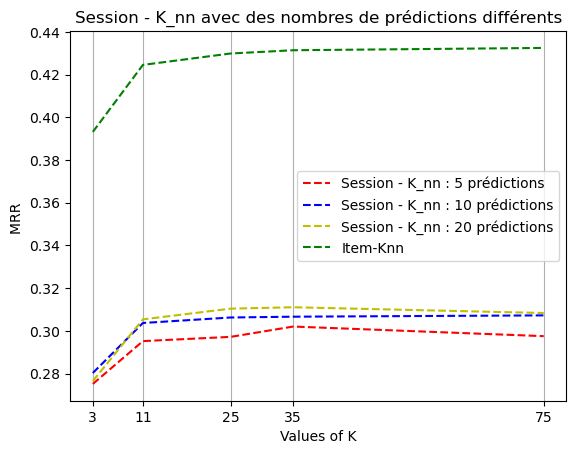

In [4]:
k_values = [3, 11, 25, 35, 75]
prediction_numbers = [5,10,20, 0]
scores = [[],[],[], []]
count_p = 0
data_train_fine, _, _ = data_manip.train_test_split(data_train, 70000, None)
for p_numbers in prediction_numbers:
    if (count_p == 3) :
        knn = ItemKnn(k, max_item + 1)
        knn.fit(data_train_fine)
        for k in k_values:

            knn._k = k
            count = 0
            train_acc, valid_acc = 0, 0
            for train_d, train_t in data_manip.kFold_split(data_train_fine, 5):
                print(f"train_d size : {train_d.shape}")
                print(f"train_t size : {train_t.shape}")
                print(f"knn k : {knn._k}")

                test_set, test_target = data_manip.prepare_data_for_test(train_t)
                
                valid_acc += knn.mrr_score(test_set, test_target)
                # valid_acc += knn.mrr_score(test_set, test_target)
                count += 1
            scores[count_p].append(valid_acc/count)
    else:
        
    
        for k in k_values:

            knn = Knn(k, max_item + 1, p_numbers)

            count = 0
            train_acc, valid_acc = 0, 0
            for train_d, train_t in data_manip.kFold_split(data_train_fine, 5):
                print(f"train_d size : {train_d.shape}")
                print(f"train_t size : {train_t.shape}")
                knn.fit(train_d)
                print(f"knn k : {knn._k}")

                test_set, test_target = data_manip.prepare_data_for_test(train_t)
                y_hat = knn.predict(test_set)
                valid_acc += mean_reciprocal_rank(y_hat, test_target)
                # valid_acc += knn.mrr_score(test_set, test_target)
                count += 1
            scores[count_p].append(valid_acc/count)
    count_p += 1

fig = pyplot.figure()
ax = fig.add_subplot(111)

ax.set_title('Session - K_nn avec des nombres de prédictions différents')  # À modifier / to be modified
ax.plot(k_values, scores[0], 'r--', label=f"Session - K_nn : {prediction_numbers[0]} prédictions") # À compléter / to be completed
ax.plot(k_values, scores[1], 'b--', label=f"Session - K_nn : {prediction_numbers[1]} prédictions") # À compléter / to be completed
ax.plot(k_values, scores[2], 'y--', label=f"Session - K_nn : {prediction_numbers[2]} prédictions")
ax.plot(k_values, scores[3], 'g--', label="Item-Knn")
ax.set_xticks(k_values, k_values)
ax.grid(axis='x')
ax.set_xlabel("Values of K")
ax.set_ylabel("MRR ")
pyplot.legend()
pyplot.show()

In [10]:
knn = Knn(75, max_item + 1, 20)
knn.fit(data_train)
mrr_20 = []
hit_1 = []
hit_3 = []
hit_5 = []

count = 0
for train_d in data_manip.Split(data_test, 10):
    test_set, test_target = data_manip.prepare_data_for_test(train_d)
    y_hat = knn.predict(test_set)
    mrr_20.append(mean_reciprocal_rank(y_hat, test_target))
    print(f"Mrr 20 : {mrr_20[count]}")
    hit_1.append(hit_rate(y_hat, test_target, 1))
    hit_3.append(hit_rate(y_hat, test_target, 3))
    hit_5.append(hit_rate(y_hat, test_target, 5))
    print(f"hit_1 : {hit_1[count]}")
    print(f"hit_3 : {hit_3[count]}")
    print(f"hit_5 : {hit_5[count]}")
    count += 1


  0%|          | 0/601702 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply 

Mrr 20 : 0.44001459446184427
hit_1 : 0.3171959914244403
hit_3 : 0.5210151069452061
hit_5 : 0.5992421598444433


  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a

Mrr 20 : 0.43995091333712283
hit_1 : 0.316398264944907
hit_3 : 0.5237074338136312
hit_5 : 0.6006880390885975


  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a

Mrr 20 : 0.43459346347140443
hit_1 : 0.311911053497532
hit_3 : 0.5149823004437354
hit_5 : 0.59305977962806


  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a

Mrr 20 : 0.4388748295302234
hit_1 : 0.31739542304432367
hit_3 : 0.5227601336191853
hit_5 : 0.5983447175549683


  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a

Mrr 20 : 0.4376798131464539
hit_1 : 0.3136560801715112
hit_3 : 0.521962407139652
hit_5 : 0.6007378969935683


  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a

Mrr 20 : 0.4394269473610863
hit_1 : 0.313705938076482
hit_3 : 0.524355586578252
hit_5 : 0.6018347709029267


  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a

KeyboardInterrupt: 

In [4]:
knn = Knn(75, max_item + 1, 20)
item_knn = ItemKnn(75, max_item + 1)

mrr_5 = []
mrr_10 = []
mrr_20 = []
hit_1 = []
hit_3 = []
hit_5 = []

# knn.fit(data_train)
item_knn.fit(data_train)

train_d = [d for d in data_manip.Split(data_test, 10)]
test_set, test_target = data_manip.prepare_data_for_test(train_d[0])

# y_hat_i = item_knn.predict(test_set)
mrr_5.append(item_knn.mrr_score(test_set, test_target, 5))
print(f"Mrr 5 Item Knn: {mrr_5[0]}")
mrr_10.append(item_knn.mrr_score(test_set, test_target, 10))
print(f"Mrr 10 Item Knn: {mrr_10[0]}")
mrr_20.append(item_knn.mrr_score(test_set, test_target, 20))
print(f"Mrr 20 Item Knn : {mrr_20[0]}")
# hit_1.append(hit_rate(y_hat_i, test_target, 1))
# hit_3.append(hit_rate(y_hat_i, test_target, 3))
# hit_5.append(hit_rate(y_hat_i, test_target, 5))
# print(f"hit_1 Item Knn: {hit_1[0]}")
# print(f"hit_3 Item Knn : {hit_3[0]}")
# print(f"hit_5 Item Knn : {hit_5[0]}")

# y_hat_s = knn.predict(test_set)
# mrr_5.append(mean_reciprocal_rank(y_hat_s, test_target, 5))
# print(f"Mrr 5 Session Knn : {mrr_5[1]}")
# mrr_10.append(mean_reciprocal_rank(y_hat_s, test_target, 10))
# print(f"Mrr 10 Session Knn : {mrr_10[1]}")
# mrr_20.append(mean_reciprocal_rank(y_hat_s, test_target, 20))
# print(f"Mrr 20 Session Knn : {mrr_20[1]}")
# hit_1.append(hit_rate(y_hat_s, test_target, 1))
# hit_3.append(hit_rate(y_hat_s, test_target, 3))
# hit_5.append(hit_rate(y_hat_s, test_target, 5))
# print(f"hit_1 Session Knn : {hit_1[1]}")
# print(f"hit_3 Session Knn : {hit_3[1]}")
# print(f"hit_5 Session Knn : {hit_5[1]}")




  0%|          | 0/601702 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
  0%|          | 0/20057 [00:00<?, ?it/s]c:\Users\david\anaconda3\envs\test_env\lib\site-packages\tqdm\std.py:1180: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply 

Mrr 5 Item Knn: 4.758517995791765e-06


100%|██████████| 20057/20057 [00:25<00:00, 783.85it/s] 


Mrr 10 Item Knn: 8.809244487561285e-05


100%|██████████| 20057/20057 [00:31<00:00, 641.84it/s] 

Mrr 20 Item Knn : 0.00026038139501724804


In [3]:
predictors = [Knn(5, max_item + 1, 20)]
# training_size = [10000, 200000, 500000, 1000000]
training_size = [10000, 50000, 10000, 200000, 300000]
accuracy = dict()
mrr_accuracy = dict()
time_perf_train = []
time_perf_test = dict()
k_values = [3, 5, 10, 15, 20, 30, 50, 100]
test_size = 10000

# max_item = np.max(pd.unique(data["ItemId"]))
# prd._max_item_id = max_item + 1

for prd in predictors:
    for train_size in training_size:
        print(data_train.shape)
        train_set, test_set ,train_size= data_manip.train_test_split(data_train,train_size, test_size)
        mrr_accuracy[train_size] = []

        t0 = time.time()
        prd.fit(train_set)
        time_perf_train.append(time.time() - t0)
        test_set, test_target = data_manip.prepare_data_for_test(test_set)
        for k in k_values:
            prd._k = k
            predicted = prd.predict(test_set)
            mrr_accuracy[train_size].append(mean_reciprocal_rank(predicted, test_target))

pyplot.figure()
for size in training_size:
    pyplot.plot(k_values, mrr_accuracy[size], label=f"t_size={size}")
pyplot.xlabel("k")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.show()

pyplot.figure()
pyplot.plot(training_size, time_perf_train, label="time of train")
pyplot.xlabel('train session size')
pyplot.ylabel('time')
pyplot.legend()
pyplot.show()


(3163163, 3)
train size was modified real train session size is 10000


6001it [00:03, 1694.80it/s]


KeyboardInterrupt: 